# Making a striplog from one of Peter Giles images

In this recipe we will show how to create a `striplog` from one Peter's images.

First, import modules we might need

In [1]:
import matplotlib.pyplot as plt
% matplotlib inline

import numpy as np

import striplog

In [2]:
striplog.__version__

'0.7.0'

## Making a striplog

In [3]:
from striplog import Striplog, Legend
imgfile = "data/images/P-140_Giles_15_1527.png"

Let's take a look at the <b>image</b>. This is not yet a striplog. Use `imread` to create a numpy array, `im`, from the image.


In [4]:
% matplotlib inline

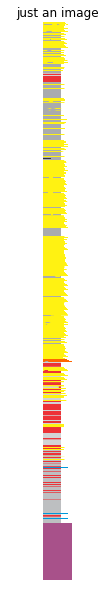

In [5]:
from pylab import imread
im = imread(imgfile)
plt.figure(figsize=(2,10))
plt.imshow(im, aspect=0.5)
plt.axis('off')
plt.title("just an image")
plt.show()

# Make a legend

In [6]:
# Peter Giles Legend

LEGEND_GILES = """colour, width, component lithology, component colour
#FFF057, 6, Sandstone, Grey,
#A9ABAE, 4, Siltstone, Grey,
#EF303D, 4, Siltstone, Red,
#FF642A, 4, Conglomerate, ,
#373435, 2, Coal, ,
#009AD4, 4, Dolomite, ,
#A95286, 7, Rhyolite, ,
"""

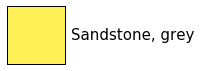

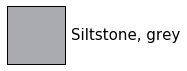

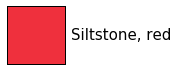

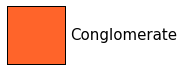

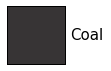

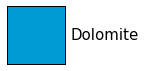

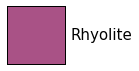

In [7]:
legend = Legend.from_csv(LEGEND_GILES)
legend.plot()

In the file name we have indicated the top (25 m) and bottom (2618 m) extents of the image. 

In [8]:
top, base = 15.0, 1527.0
tolerance = 100  # increase this number to allow for more tolerance to colour match with legend
strip = Striplog.from_image(imgfile, top, base, tolerance = 100, legend=legend)
strip

/Users/Evan/anaconda/envs/welly/lib/python3.5/site-packages/striplog/legend.py:754: UserWarning: No match found for #ffffff with tolerance of 100. Best match is Siltstone, grey, #a9abae, d=144.9586147836685
  warnings.warn(w)


Striplog(476 Intervals, start=15.0, stop=1527.0)

In [9]:
strip.thinnest()

Interval({'data': {}, 'description': '', 'base': Position({'units': 'm', 'middle': 574.4179431072209}), 'components': [Component({'colour': 'grey', 'lithology': 'siltstone'})], 'top': Position({'units': 'm', 'middle': 574.2525164113786})})

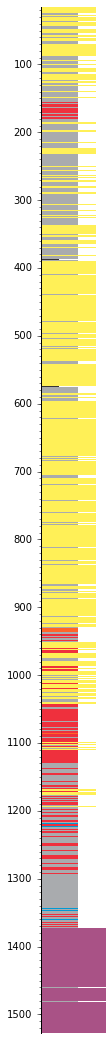

In [10]:
%matplotlib inline
strip.plot(legend)

Do we need to deal with gaps or overlaps?

In [11]:
# let's see if there are any
print(strip.find_gaps())

None


In [12]:
strip.start.z, strip.stop.z

(15.0, 1527.0)

In [13]:
n = strip.read_at(800.0, index=True)
strip[n]

Interval({'data': {}, 'description': '', 'base': Position({'units': 'm', 'middle': 810.5921225382933}), 'components': [Component({'colour': 'grey', 'lithology': 'sandstone'})], 'top': Position({'units': 'm', 'middle': 778.6647702407002})})

It's easy to form a chunk of LAS3-style text using the `striplog.to_las3()` method:

In [14]:
step = 0.1524  # desired sample interval of output logs
lith = strip.to_log(step=step, legend=legend)
gs, z, table = strip.to_log(legend=legend, legend_field='width', return_meta=True, step=step)

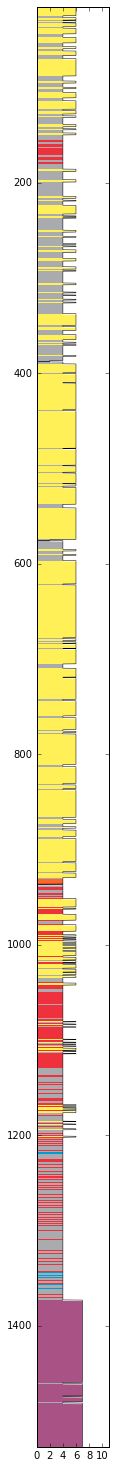

In [15]:
width = 10

fig = plt.figure(figsize=(1,20))
ax = fig.add_axes([0, 0, 1, 1])
ax = strip.plot_axis(ax, legend, default_width=width+1)

plt.plot(gs, z, color='k', lw=0.5)
plt.fill_betweenx(z, gs, width+1, edgecolor='white', facecolor='white', zorder=2)

ax.set_xlim([0, width+1])
ax.set_ylim([strip.stop.z, strip.start.z])
plt.show()